In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from skimage.feature import hog
from skimage import exposure
from mlxtend.data import loadlocal_mnist
from mlxtend.plotting import plot_confusion_matrix

In [62]:
trainData, trainLabels = loadlocal_mnist(images_path='train-images.idx3-ubyte',
                                             labels_path='train-labels.idx1-ubyte')

In [63]:
testImages, testLabels = loadlocal_mnist(images_path='t10k-images.idx3-ubyte',
                                             labels_path='t10k-labels.idx1-ubyte')

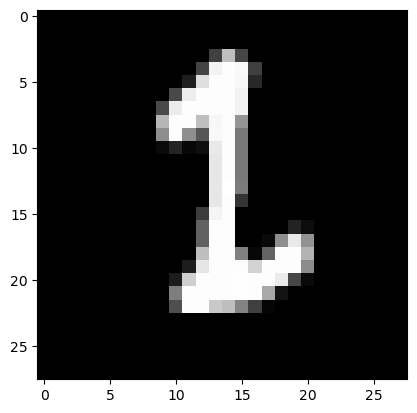

In [64]:
plt.imshow(trainData[70].reshape(28,28), cmap='gray')

In [65]:

# HOG Feature Extraction
def extract_hog_features(data):
    features = []
    for img in data:
        # Reshape the image to 28x28 (assuming MNIST images are 28x28)
        img = img.reshape((28, 28))
        # Extract HOG features
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        features.append(fd)
    return np.array(features)

In [66]:
trainFeatures = extract_hog_features(trainData)
testFeatures = extract_hog_features(testImages)

In [91]:
# Standardize the features
scaler = StandardScaler().fit(trainFeatures)
trainFeatures = np.array(trainFeatures)
testFeatures = np.array(testFeatures)
trainData = np.array(trainData)
testImages = np.array(testImages)

In [68]:
# Train the SVM model
model = svm.SVC(kernel="linear", C=0.01)
model.fit(trainFeatures, trainLabels)

SVC(C=0.01, kernel='linear')

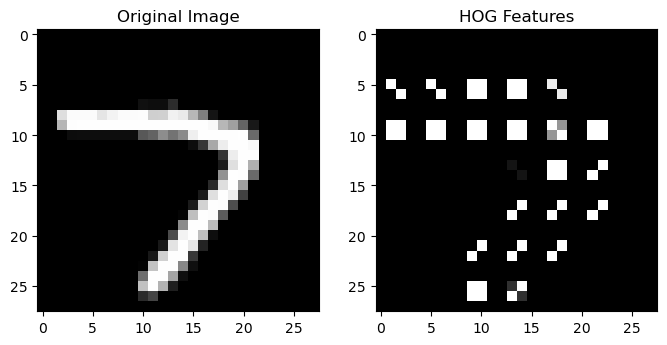

In [70]:
# Optionally, you can visualize the HOG features of an example image
example_img = testImages[70].reshape((28, 28))
_, hog_example = hog(example_img, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True)
hog_example_rescaled = exposure.rescale_intensity(hog_example, in_range=(0, 10))
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(example_img, cmap=plt.cm.gray)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(hog_example_rescaled, cmap=plt.cm.gray)
plt.title('HOG Features')
plt.show()

In [89]:
# Make predictions on the test set
predictions = model.predict(testFeatures)
predictions[30]

3

In [81]:
from mlxtend.plotting import plot_confusion_matrix
class_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [93]:
conf_mat = metrics.confusion_matrix(testLabels, predictions)
conf_mat

array([[ 955,    3,    1,    1,    1,    1,   11,    1,    4,    2],
       [   0, 1116,    5,    0,   10,    0,    3,    0,    1,    0],
       [   3,    1,  971,   20,    3,    5,    6,    8,    6,    9],
       [   3,    0,   15,  932,    0,   15,    0,    4,   24,   17],
       [   5,   11,    1,    1,  908,    1,   15,    5,    7,   28],
       [   2,    0,    0,   17,    0,  837,   16,    0,   17,    3],
       [  11,    2,    1,    0,    8,   14,  916,    0,    6,    0],
       [   1,    5,   28,    8,   17,    2,    0,  923,    7,   37],
       [  12,    1,    7,   20,    9,   10,    6,    6,  884,   19],
       [  13,    2,    1,    8,   13,    6,    1,   17,   21,  927]],
      dtype=int64)

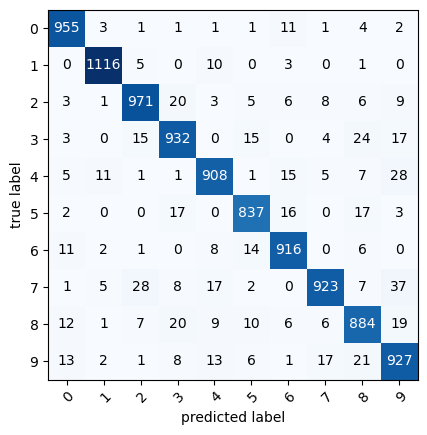

In [94]:
fig, ax = plot_confusion_matrix(conf_mat = conf_mat, class_names=class_name)

In [87]:
precision = metrics.precision_score(y_test, y_pred, average=None)
precision

array([0.95024876, 0.9780894 , 0.94271845, 0.92552135, 0.9370485 ,
       0.93939394, 0.94045175, 0.95746888, 0.90481064, 0.88963532])

In [88]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9369